In [30]:
pip install mibian

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mibian: filename=mibian-0.1.3-py3-none-any.whl size=4026 sha256=e5b1ffc0797ab15019091f99f701dc9ca9b08ef04811f9cc8208dd9aa3265147
  Stored in directory: c:\users\paras\appdata\local\pip\cache\wheels\2c\4f\a7\be034e17cc306b0850f5f1a5b4541281b49475c58620a7ff40
Successfully built mibian

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: C:\Users\paras\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import yfinance as yf
import json

symbol = "TSLA"

# Create the object representing the symbol of interest
equity = yf.Ticker(symbol)

current_price = equity.info['currentPrice']
print(f"Current price of {symbol} - {current_price}")

Current price of TSLA - 287.965


In [27]:
expiration_date=equity.options[1]
opt = equity.option_chain(expiration_date)
opt



Options(calls=          contractSymbol             lastTradeDate   strike  lastPrice  \
0    TSLA220916C00001670 2022-09-01 13:45:37+00:00     1.67     273.11   
1    TSLA220916C00003330 2022-08-23 13:40:46+00:00     3.33     285.73   
2    TSLA220916C00005000 2022-09-01 13:45:37+00:00     5.00     269.77   
3    TSLA220916C00006670 2022-08-19 18:37:34+00:00     6.67     289.91   
4    TSLA220916C00008330 2022-09-01 19:30:47+00:00     8.33     265.10   
..                   ...                       ...      ...        ...   
554  TSLA220916C03800000 2020-08-28 19:27:57+00:00  3800.00     530.46   
555  TSLA220916C03900000 2020-08-28 13:42:05+00:00  3900.00     570.00   
556  TSLA220916C04000000 2020-08-28 19:07:45+00:00  4000.00     502.50   
557  TSLA220916C04100000 2020-08-27 16:37:45+00:00  4100.00     523.91   
558  TSLA220916C04200000 2020-08-28 19:57:11+00:00  4200.00     484.00   

        bid     ask     change  percentChange  volume  openInterest  \
0    285.25  286.15   0.00

In [55]:
# Lets choose the options out a few days
expiration_date = equity.options[2]
print("Expiration Date: ", expiration_date)

# get option chain for specific expiration
opt = equity.option_chain(expiration_date)

# Choosing a strike price appropriate for our strategy
strike_price = 300

# Get the available data for the option contract with our chosen strike price
option_data_at_strike = opt.calls.loc[opt.calls['strike'] == strike_price]
implied_volatility = option_data_at_strike['impliedVolatility'].values[0]
print(f"Option Implied Volatility: {implied_volatility}")


Expiration Date:  2022-09-23
Option Implied Volatility: 0.4821218780517579
         contractSymbol             lastTradeDate  strike  lastPrice  bid  \
78  TSLA220923C00300000 2022-09-08 16:00:32+00:00   300.0       5.83  5.3   

    ask  change  percentChange  volume  openInterest  impliedVolatility  \
78  5.4    0.39       7.169115   840.0          2380           0.482122   

    inTheMoney contractSize currency  
78       False      REGULAR      USD  


In [56]:
from datetime import date

current_date_object = date.today()
expiration_date_object = date.fromisoformat(expiration_date)

# We need the number of days until expiration for our plots
days_to_expire = (expiration_date_object - current_date_object).days

In [59]:
import numpy as np
# np.set_printoptions(suppress=True)

# Create an array of possible share prices starting $20 below the current
# price and ending $20 above the current price, at $1 intervals.
share_prices = np.arange(current_price-20, current_price+20, 1)
share_prices

array([267.965, 268.965, 269.965, 270.965, 271.965, 272.965, 273.965,
       274.965, 275.965, 276.965, 277.965, 278.965, 279.965, 280.965,
       281.965, 282.965, 283.965, 284.965, 285.965, 286.965, 287.965,
       288.965, 289.965, 290.965, 291.965, 292.965, 293.965, 294.965,
       295.965, 296.965, 297.965, 298.965, 299.965, 300.965, 301.965,
       302.965, 303.965, 304.965, 305.965, 306.965])

In [50]:
import mibian

def create_value_matrix(prices, 
                        number_of_days, 
                        strike, 
                        implied_volatility):
    # Create an empty array to hold the estimated option values
    output_array = np.zeros((len(prices), number_of_days))

    # For each possible share price...
    for i, p in enumerate(prices):
        # ...and each day from now to expiration
        for d in range(number_of_days):
            # Get the Black-Scholes data for the contract assuming the 
            # given price and days until expiration
            bsData = mibian.BS([p, strike, 0, number_of_days - d],volatility= implied_volatility*100)
            
            # For the sake of this tutorial, we're doing strategies with calls.
            # Puts are similar
            price = bsData.callPrice
            output_array[i,d] = round(price, 2)
            
    return output_array
        
price_matrix = create_value_matrix(share_prices, 
                                   days_to_expire, 
                                   strike_price, 
                                   implied_volatility)

# Keep in mind, the origin of the points on the matrix is in 
# the upper left, this means it's upside down from what 
# we're expecting, with higher share prices increasing from 
# top to bottom and days counting from left to right.
print(price_matrix)


[[ 1.34  1.18  1.03  0.88  0.73  0.6   0.47  0.35  0.24  0.16  0.09  0.04
   0.01  0.    0.  ]
 [ 1.46  1.29  1.13  0.97  0.82  0.67  0.53  0.4   0.28  0.18  0.1   0.05
   0.01  0.    0.  ]
 [ 1.59  1.41  1.24  1.07  0.91  0.75  0.6   0.46  0.33  0.22  0.13  0.06
   0.02  0.    0.  ]
 [ 1.73  1.54  1.36  1.18  1.01  0.84  0.67  0.52  0.38  0.26  0.15  0.07
   0.02  0.    0.  ]
 [ 1.87  1.68  1.49  1.3   1.11  0.93  0.76  0.59  0.44  0.3   0.18  0.09
   0.03  0.    0.  ]
 [ 2.03  1.83  1.63  1.43  1.23  1.04  0.85  0.67  0.5   0.35  0.22  0.11
   0.04  0.01  0.  ]
 [ 2.2   1.98  1.77  1.56  1.35  1.15  0.95  0.76  0.58  0.41  0.26  0.14
   0.05  0.01  0.  ]
 [ 2.37  2.15  1.93  1.71  1.49  1.27  1.06  0.85  0.66  0.47  0.31  0.17
   0.07  0.01  0.  ]
 [ 2.56  2.33  2.1   1.87  1.64  1.41  1.18  0.96  0.75  0.55  0.36  0.21
   0.09  0.02  0.  ]
 [ 2.76  2.52  2.28  2.04  1.79  1.55  1.31  1.08  0.85  0.63  0.43  0.25
   0.11  0.03  0.  ]
 [ 2.96  2.72  2.47  2.22  1.96  1.71  1.46  1.2  

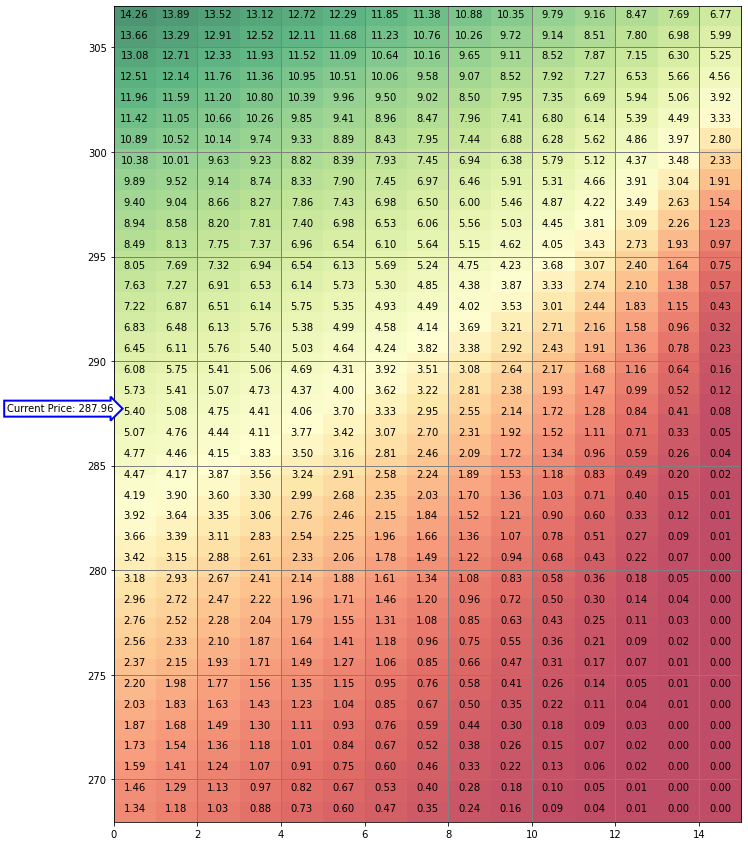

In [86]:
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patheffects as PathEffects

# We want to take an arbitrary price matrix and display it nicely
def display_value_matrix(matrix, 
                         share_prices, 
                         days_to_expire, 
                         underlying_price):
    fig, ax = plt.subplots(figsize=(15,15))

    for x in range(days_to_expire):
        for i in range(len(share_prices)-1):
            y = share_prices[i]
            txt = ax.text(x+0.5,y+0.5 , "{:.2f}".format(matrix[i,x]), 
                          ha='center', color='k')

    divnorm=colors.TwoSlopeNorm(vmin=np.min(matrix), 
                                vcenter=np.average(matrix), 
                                vmax=np.max(matrix))
            
    ax.imshow(matrix, origin="lower", cmap="RdYlGn", alpha=0.7,
              extent = [0 , days_to_expire, 
                        share_prices[0], share_prices[-1]],
              norm=divnorm)
    
    ax.text(0, underlying_price, 
            "Current Price: {:.2f}".format(underlying_price), 
            ha="right", va="top", rotation=0, size=10,
            bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="b", lw=2))

    ax.grid(which="both", c="grey", linewidth=1)

    ax.set_aspect(0.5)
    plt.show()
    
display_value_matrix(price_matrix, 
                     share_prices, 
                     days_to_expire, 
                     current_price)

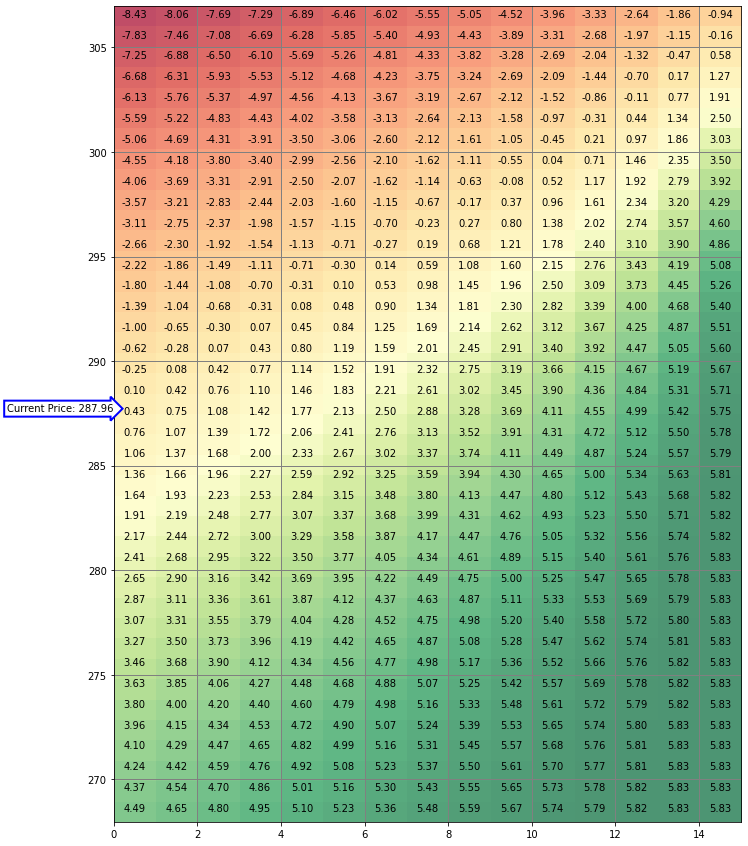

In [87]:
# Short Call

# Get the current price of the option we want to sell
current_option_price = option_data_at_strike['lastPrice'].values[0]

# Now, the values of our matrix will be the money we get from selling 
# the option, minus the current value of the option.
# For example, if we were to sell the option for $1, then immediately 
# buy it back to close the position, it would effectively have no value.
# +$1 selling, -$1 buying to close = $1-$1 = $0
short_values = current_option_price - price_matrix

display_value_matrix(short_values, share_prices, days_to_expire, current_price)

Short Price:  9.31
Long Price:  3.11


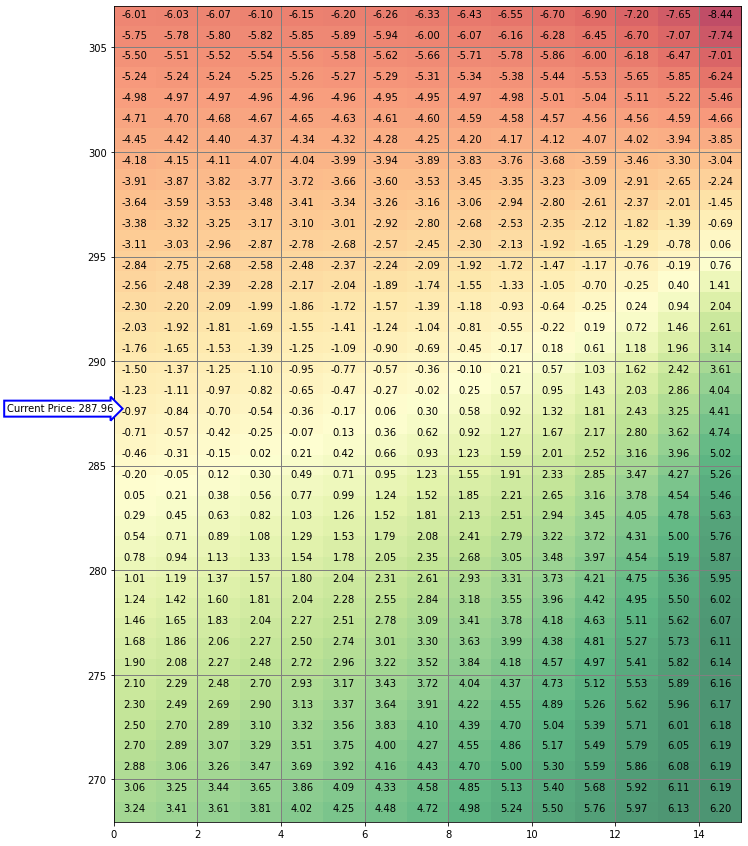

In [88]:
# More complicated strategies - Call Credit Spread

# Short (sell) position
short_strike_price = 290
short_option_data_at_strike = opt.calls.loc[opt.calls['strike'] == short_strike_price]
short_implied_volatility = short_option_data_at_strike['impliedVolatility'].values[0]
short_option_price = short_option_data_at_strike['lastPrice'].values[0]
short_call_matrix = create_value_matrix(share_prices, 
                                        days_to_expire, 
                                        short_strike_price, 
                                        short_implied_volatility)

print("Short Price: ", short_option_price)

# Long (buy) position
long_strike_price = 310
long_option_data_at_strike = opt.calls.loc[opt.calls['strike'] == long_strike_price]
long_implied_volatility = long_option_data_at_strike['impliedVolatility'].values[0]
long_option_price = long_option_data_at_strike['lastPrice'].values[0]
long_call_matrix = create_value_matrix(share_prices, 
                                       days_to_expire, 
                                       long_strike_price, 
                                       long_implied_volatility)

print("Long Price: ", long_option_price)

# The entry cost is the amount we get when we first buy and sell our options
entry_cost = short_option_price - long_option_price

# The matrix for this position is the entry cost minus the amount 
# it would take to close the positions.
call_spread_matrix = entry_cost - short_call_matrix + long_call_matrix

display_value_matrix(call_spread_matrix, 
                     share_prices, 
                     days_to_expire, 
                     current_price)